In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

yourpath = '/content/drive/MyDrive/20212/class/nlp/ner-vietnamese/data/final/conll'

sentences = []
for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files: 
        with open(os.path.join(root, name), 'r') as f:
            data = f.read()
            sentences = sentences + (data.split('\n\n'))
  
sentences_remove_null =list(filter(lambda a: a != '', sentences))  # remove last null item at last file

In [3]:
sentences_remove_null[1:3]

['Cựu\t_\t_\tB-PERSONTYPE\nthư\t_\t_\tI-PERSONTYPE\nký\t_\t_\tI-PERSONTYPE\ncủa\t_\t_\tO\nHà\t_\t_\tB-PERSON\nVăn\t_\t_\tI-PERSON\nThắm\t_\t_\tI-PERSON\n(\t_\t_\tO\nHoàng\t_\t_\tB-PERSON\nThị\t_\t_\tI-PERSON\nHồng\t_\t_\tI-PERSON\nTứ\t_\t_\tI-PERSON\n)\t_\t_\tO\nđược\t_\t_\tO\nđề\t_\t_\tO\nnghị\t_\t_\tO\ncho\t_\t_\tO\nhưởng\t_\t_\tO\nán\t_\t_\tO\ntreo\t_\t_\tO\n.\t_\t_\tO\nMột\t_\t_\tO\nsố\t_\t_\tO\ngiám\t_\t_\tB-PERSONTYPE\nđốc\t_\t_\tI-PERSONTYPE\nchi\t_\t_\tI-PERSONTYPE\nnhánh\t_\t_\tI-PERSONTYPE\n,\t_\t_\tO\nphòng\t_\t_\tO\ngiao\t_\t_\tO\ndịch\t_\t_\tO\nđược\t_\t_\tO\nđề\t_\t_\tO\nnghị\t_\t_\tO\nmiễn\t_\t_\tO\ntrách\t_\t_\tO\nnhiệm\t_\t_\tO\nhình\t_\t_\tO\nsự\t_\t_\tO\n.\t_\t_\tO',
 'Thanh\t_\t_\tB-PERSONTYPE\nniên\t_\t_\tI-PERSONTYPE\nngáo\t_\t_\tI-PERSONTYPE\nđá\t_\t_\tI-PERSONTYPE\ngiết\t_\t_\tO\nhàng\t_\t_\tB-PERSON\nxóm\t_\t_\tI-PERSON\nlãnh\t_\t_\tO\nán\t_\t_\tO']

In [4]:
len(sentences_remove_null)

19693

In [5]:
train_data = []
for sent in sentences_remove_null:
    x = []
    items = sent.split('\n') 
    for item in items:
        try:
            word, _, _, ner = item.split('\t')[:4]
            x.append((word, ner))
        except : 
            x.append((word, 'O'))
     
    train_data.append(x)

In [6]:
len(train_data)

19693

In [7]:
train_data[1:3]

[[('Cựu', 'B-PERSONTYPE'),
  ('thư', 'I-PERSONTYPE'),
  ('ký', 'I-PERSONTYPE'),
  ('của', 'O'),
  ('Hà', 'B-PERSON'),
  ('Văn', 'I-PERSON'),
  ('Thắm', 'I-PERSON'),
  ('(', 'O'),
  ('Hoàng', 'B-PERSON'),
  ('Thị', 'I-PERSON'),
  ('Hồng', 'I-PERSON'),
  ('Tứ', 'I-PERSON'),
  (')', 'O'),
  ('được', 'O'),
  ('đề', 'O'),
  ('nghị', 'O'),
  ('cho', 'O'),
  ('hưởng', 'O'),
  ('án', 'O'),
  ('treo', 'O'),
  ('.', 'O'),
  ('Một', 'O'),
  ('số', 'O'),
  ('giám', 'B-PERSONTYPE'),
  ('đốc', 'I-PERSONTYPE'),
  ('chi', 'I-PERSONTYPE'),
  ('nhánh', 'I-PERSONTYPE'),
  (',', 'O'),
  ('phòng', 'O'),
  ('giao', 'O'),
  ('dịch', 'O'),
  ('được', 'O'),
  ('đề', 'O'),
  ('nghị', 'O'),
  ('miễn', 'O'),
  ('trách', 'O'),
  ('nhiệm', 'O'),
  ('hình', 'O'),
  ('sự', 'O'),
  ('.', 'O')],
 [('Thanh', 'B-PERSONTYPE'),
  ('niên', 'I-PERSONTYPE'),
  ('ngáo', 'I-PERSONTYPE'),
  ('đá', 'I-PERSONTYPE'),
  ('giết', 'O'),
  ('hàng', 'B-PERSON'),
  ('xóm', 'I-PERSON'),
  ('lãnh', 'O'),
  ('án', 'O')]]

In [8]:
index = []
word = []
ner = []
for i,sent in  enumerate(train_data):
  for (w,n) in sent:
    index.append(i)
    word.append(w)
    ner.append(n)

In [10]:
import pandas as pd
data = pd.DataFrame([index,word,ner]) #Each list would be added as a row
data = data.transpose() #To Transpose and make each rows as columns
data.columns=['sent_index','word','ner']

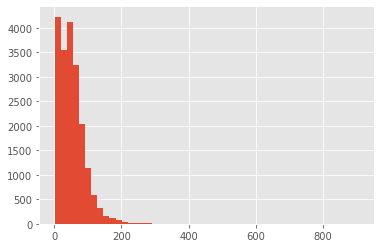

In [11]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.hist([len(s) for s in train_data], bins=50)
plt.show()

In [12]:
maxlen = max([len(s) for s in train_data])
print(maxlen)

908


In [13]:
data

,sent_index,word,ner
0,0,Đại,B-PERSONTYPE
1,0,diện,I-PERSONTYPE
2,0,VKS,I-PERSONTYPE
3,0,đề,O
4,0,nghị,O
...,...,...,...
1029851,19692,cựu,B-PERSONTYPE
1029852,19692,Chủ,I-PERSONTYPE
1029853,19692,tịch,I-PERSONTYPE
1029854,19692,HĐQT,I-PERSONTYPE


In [14]:
data.loc[data['ner'] == 'B-ORGANIZATION', 'word'].head()

62     HĐXX
167    UBND
217    Công
269      Sở
272    công
Name: word, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


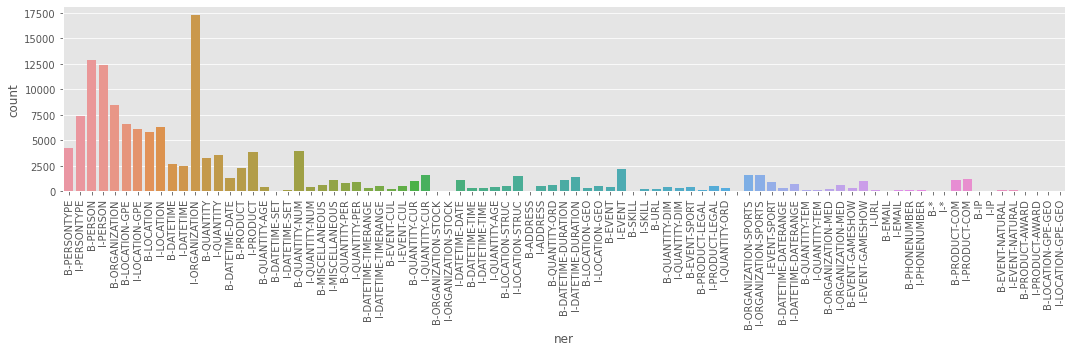

In [15]:
import seaborn as sns

plt.figure(figsize=(15, 5))

data_ner_non_null = data.drop(data[data['ner'] == 'O'].index)

data_ner_non_null

ax = sns.countplot('ner', data=data_ner_non_null)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

In [16]:
!pip install sklearn-crfsuite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from itertools import chain

import nltk
import sklearn
import scipy.stats

import sklearn_crfsuite
from sklearn_crfsuite import scorers,CRF
from sklearn_crfsuite.metrics import flat_classification_report
from sklearn_crfsuite import metrics

In [18]:
def word2features(sent, i):
    word = sent[i][0] 

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(), 
    }
    if i > 0:
        word1 = sent[i-1][0] 
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(), 
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0] 
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(), 
        })
    else:
        features['EOS'] = True

    return features

In [19]:
def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, label in sent]

In [20]:
data

,sent_index,word,ner
0,0,Đại,B-PERSONTYPE
1,0,diện,I-PERSONTYPE
2,0,VKS,I-PERSONTYPE
3,0,đề,O
4,0,nghị,O
...,...,...,...
1029851,19692,cựu,B-PERSONTYPE
1029852,19692,Chủ,I-PERSONTYPE
1029853,19692,tịch,I-PERSONTYPE
1029854,19692,HĐQT,I-PERSONTYPE


In [21]:
# agg_func = lambda s: [(w, n) for w, n in zip(s["word"].values.tolist(), 
#                                                            s["ner"].values.tolist())]
# sent_df_grouped = data.groupby("sent_index").apply(agg_func)
# sentences_df = [s for s in sent_df_grouped]

In [22]:
#Creating the train and test set
X = [sent2features(s) for s in train_data]
y = [sent2labels(s) for s in train_data]

In [23]:
X[1]

[{'+1:word.istitle()': False,
  '+1:word.isupper()': False,
  '+1:word.lower()': 'thư',
  'BOS': True,
  'bias': 1.0,
  'word.isdigit()': False,
  'word.istitle()': True,
  'word.isupper()': False,
  'word.lower()': 'cựu',
  'word[-2:]': 'ựu',
  'word[-3:]': 'Cựu'},
 {'+1:word.istitle()': False,
  '+1:word.isupper()': False,
  '+1:word.lower()': 'ký',
  '-1:word.istitle()': True,
  '-1:word.isupper()': False,
  '-1:word.lower()': 'cựu',
  'bias': 1.0,
  'word.isdigit()': False,
  'word.istitle()': False,
  'word.isupper()': False,
  'word.lower()': 'thư',
  'word[-2:]': 'hư',
  'word[-3:]': 'thư'},
 {'+1:word.istitle()': False,
  '+1:word.isupper()': False,
  '+1:word.lower()': 'của',
  '-1:word.istitle()': False,
  '-1:word.isupper()': False,
  '-1:word.lower()': 'thư',
  'bias': 1.0,
  'word.isdigit()': False,
  'word.istitle()': False,
  'word.isupper()': False,
  'word.lower()': 'ký',
  'word[-2:]': 'ký',
  'word[-3:]': 'ký'},
 {'+1:word.istitle()': True,
  '+1:word.isupper()': Fal

In [24]:
y[1]

['B-PERSONTYPE',
 'I-PERSONTYPE',
 'I-PERSONTYPE',
 'O',
 'B-PERSON',
 'I-PERSON',
 'I-PERSON',
 'O',
 'B-PERSON',
 'I-PERSON',
 'I-PERSON',
 'I-PERSON',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-PERSONTYPE',
 'I-PERSONTYPE',
 'I-PERSONTYPE',
 'I-PERSONTYPE',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O']

In [25]:
def feature_map(word):
    return np.array([word.istitle(), word.islower(), word.isupper(), len(word),
                     word.isdigit(),  word.isalpha()])

In [ ]:
import numpy as np

words = [feature_map(w) for w in data["word"].values.tolist()]
tags = data["ner"].values.tolist()

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import cross_val_predict, cross_val_score

# test k-fold
pred = cross_val_predict(RandomForestClassifier(n_estimators=20),X=words, y=tags, cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [29]:
from sklearn.metrics import classification_report
report = classification_report(y_pred=pred, y_true=tags)
print(report)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                       precision    recall  f1-score   support

                            0.00      0.00      0.00         3
                  B-*       0.00      0.00      0.00         2
            B-ADDRESS       0.00      0.00      0.00        58
           B-DATETIME       0.00      0.00      0.00      2637
      B-DATETIME-DATE       0.00      0.00      0.00      1324
 B-DATETIME-DATERANGE       0.00      0.00      0.00       321
  B-DATETIME-DURATION       0.00      0.00      0.00      1090
       B-DATETIME-SET       0.00      0.00      0.00        41
      B-DATETIME-TIME       0.00      0.00      0.00       310
 B-DATETIME-TIMERANGE       0.00      0.00      0.00       298
              B-EMAIL       0.00      0.00      0.00        41
              B-EVENT       0.00      0.00      0.00       446
          B-EVENT-CUL       0.00      0.00      0.00       221
     B-EVENT-GAMESHOW       0.00      0.00      0.00       342
      B-EVENT-NATURAL       0.00      0.00      0.00  

In [30]:
crf = CRF(algorithm='lbfgs',
          c1=0.1,
          c2=0.1,
          max_iterations=100,
          all_possible_transitions=False,
          keep_tempfiles=None)

In [31]:
!pip install -U 'scikit-learn<0.24'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pred = cross_val_predict(estimator=crf, X=X, y=y, cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


In [ ]:
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV